# Figure 2: Effects of the number of cells per cell type on the predictions
Distribution of the accuracy (A)and precision (B) for three example cell types in each method, when the number of cells per cell type is increased.
The red line shows the accuracy on the full data and the grey line shows the number of cells in this cell type in the full reference data. For the remaining cell types see supplementary figures S1 and S2

In [1]:
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library("RColorBrewer")
library(ggplot2)
library(dplyr)
library(purrr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell", "Megakaryocyte",
              "Natural killer cell", "CD16+ monocyte", "Dendritic cell", "Plasmacytoid dendritic cell")
coi <- c("Cytotoxic T cell", "Dendritic cell", "Plasmacytoid dendritic cell" ) # cell types of interest
methods <- c("Seurat",  "SingleR","CellID", "SingleCellNet", "ItClust")

colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes

In [3]:
data <- read.csv("../Results_old/Files/values_all.csv")
full <- read.csv("../Results_old/Files/values_full.csv")
meta <- read.csv("../Data//Fulldata/PBMC10x_Reference/meta.csv")

In [4]:
data$method <- factor(data$method, levels=methods)
data$class <- factor(data$class, levels=celltypes)
data[is.na(data)] <- 0
data_lineplot <- get_data_lineplot(data)

full <- full[,c("class", "reference", "method","accuracy", "precision")]

refSizes <- data.frame(table(meta$class_))
colnames(refSizes) <- c("class", "refSize")

data_lineplot <- merge(full, data_lineplot,
                       by=c("class", "reference", "method"))
data_lineplot <- merge(data_lineplot, refSizes, by="class")
data_lineplot$class <- factor(data_lineplot$class, levels=celltypes)
data_lineplot$method <- factor(data_lineplot$method, levels=methods)

`summarise()` has grouped output by 'size', 'method', 'reference'. You can override using the `.groups` argument.


class,refSize
<fct>,<int>
B cell,1022
CD14+ monocyte,1373
CD16+ monocyte,273
CD4+ T cell,2418
Cytotoxic T cell,3090
Dendritic cell,126
Megakaryocyte,703
Natural killer cell,623
Plasmacytoid dendritic cell,38


In [5]:
f2a <- get_lineplot(data_lineplot[data_lineplot$class %in% coi,], "Accuracy")
f2b <- get_lineplot(data_lineplot[data_lineplot$class %in% coi,], "Precision")
s1 =  get_lineplot(data_lineplot, "Accuracy")
s2 =  get_lineplot(data_lineplot, "Precision")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In [6]:
ggsave(
  "../Results/Figures/s2_CellsPerCellType_precision.eps",
  plot = s2,
  device = "eps",
  path = NULL,
  scale = 1,
  width = 180,
  height = 180,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)
ggsave(
  "../Results/Figures/s1_CellsPerCellType_accuracy.eps",
  plot = s1,
  device = "eps",
  path = NULL,
  scale = 1,
  width = 180,
  height = 180,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)

Warning message:
“Removed 32 rows containing missing values (`geom_hline()`).”
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”


Warning message:
“Removed 16 rows containing missing values (`geom_hline()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_hline()`).”


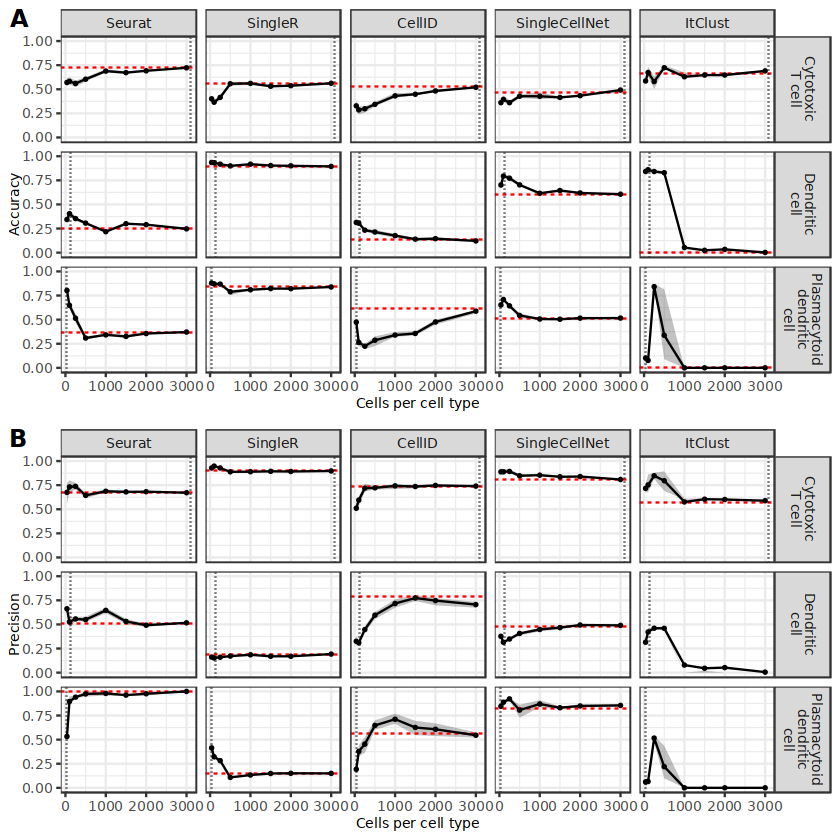

In [7]:
f2 <- ggpubr::ggarrange(f2a,f2b, nrow=2, ncol=1, labels= c("A","B"),
                        common.legend=T, legend="bottom")
f2

In [8]:
ggsave(
  "../Results/Figures/F2_PBMC_samples.eps",
  plot = f2,
  device = "eps",
  path = NULL,
  scale = 1,
  width = 180,
  height = 150,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)

Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”
